### 2. One data point can greatly affect the r2 value

##### The mccoo.txt data set contains data on the running back Eric McCoo's rushing yards (mccoo) for each game of the 1998 Penn State football season. It also contains Penn State's final score (score).

Create a fitted line plot and Interpret the r2 value, and note its size.
Remove the one data point in which McCoo ran 206 yards. Then, create another fitted line plot on the reduced data set. Interpret the r2 value. Upon removing the one data point, what happened to the r2 value?
When a correlation coefficient is reported in research journals, there often is not an accompanying scatter plot. Summarize why reported correlation values should be accompanied with either the scatter plot of the data or a description of the scatter plot.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

Run_data = pd.read_csv("DataSets/index.txt",header=0,delimiter='\t')
Run_data

,McCoo,Score
0,51,34
1,52,48
2,21,20
3,2,9
4,56,27
5,163,31
6,6,27
7,47,0
8,127,41
9,91,3


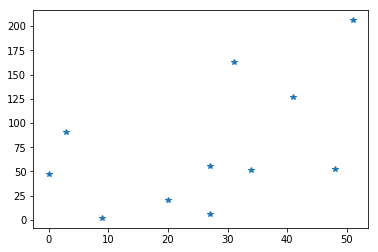

In [35]:
plt.plot(Run_data['Score'],Run_data['McCoo'],'*')

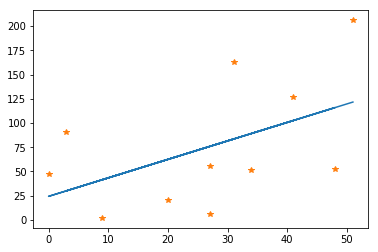

In [40]:
def function_fit(x,a,b):
    return a+b*x
x = Run_data["Score"]
y = Run_data["McCoo"]

popt , pcov = curve_fit(function_fit,x,y)
plt.plot(x,function_fit(x,*popt))
plt.plot(x,y,'*')

In [37]:
from scipy.stats import linregress

print(linregress(x,y)) 

LinregressResult(slope=1.9085283251231522, intercept=24.2380233990148, rvalue=0.4994246637091628, pvalue=0.11779685371681967, stderr=1.1035815171229921)


In [41]:
from sklearn.metrics import r2_score
y_hat = function_fit(x,*popt)
print(r2_score(y,y_hat))


0.24942499472101054


r2 value shows a slight positive association between MoOc and score

### So after fitting the data , we see r2 value = 0.2494.
##### Now we will remove the outlier value 206 from the data set and again plot

In [39]:
Run_data_2 = Run_data.drop(10)

In [32]:
r2_score

,McCoo,Score
0,51,34
1,52,48
2,21,20
3,2,9
4,56,27
5,163,31
6,6,27
7,47,0
8,127,41
9,91,3


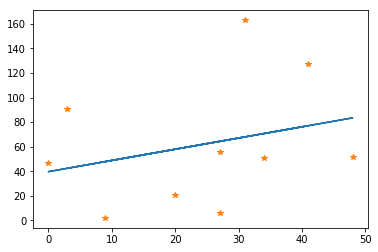

In [42]:
def function_fit(x,a,b):
    return a+b*x
x = Run_data_2["Score"]
y = Run_data_2["McCoo"]

popt , pcov = curve_fit(function_fit,x,y)
plt.plot(x,function_fit(x,*popt))
plt.plot(x,y,'*')

In [44]:
from scipy.stats import linregress
from sklearn.metrics import r2_score
y_hat = function_fit(x,*popt)
print(r2_score(y,y_hat))
print(linregress(x,y)) 

0.07901263896891475
LinregressResult(slope=0.9131004366812228, intercept=39.685589519650655, rvalue=0.2810918692685978, pvalue=0.4314355779761899, stderr=1.1021789402431341)


In [47]:
Run_data_3 = Run_data_2.drop(5)

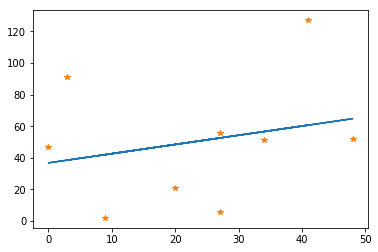

In [51]:
def function_fit(x,a,b):
    return a+b*x
x = Run_data_3["Score"]
y = Run_data_3["McCoo"]

popt , pcov = curve_fit(function_fit,x,y)
plt.plot(x,function_fit(x,*popt))
plt.plot(x,y,'*')

In [53]:
from scipy.stats import linregress
from sklearn.metrics import r2_score
y_hat = function_fit(x,*popt)
print(r2_score(y,y_hat))
print(linregress(x,y)) 

0.059551049277334456
LinregressResult(slope=0.5825546719681908, intercept=36.805119284294236, rvalue=0.2440308367344882, pvalue=0.5268788349517659, stderr=0.8750050784526654)


r2 value greatly reduces from 24% to 7% then 5% as we remove the extreme values 206 and 163 respectively

## 3. Association is not causation!

Association between the predictor x and response y should not be interpreted as implying that x causes the changes in y. There are many possible reasons for why there is an association between x and y, including:

The predictor x does indeed cause the changes in the response y.
The causal relation may instead be reversed. That is, the response y may cause the changes in the predictor x.
The predictor x is a contributing but not sole cause of changes in the response variable y.
There may be a "lurking variable" that is the real cause of changes in y but also is associated with x, thus giving rise to the observed relationship between x and y.
The association may be purely coincidental.
It is not an easy task to definitively conclude the causal relationships in #1- #3. It generally requires designed experiments and sound scientific justification. #5 is related to Type I errors in the regression setting. The exercises in this section and the next are intended to illustrate #4, that is, examples of lurking variables.

#### Drug law expenditures and drug-induced deaths

"Time" is often a lurking variable. If two things (e.g. road deaths and chocolate consumption) just happen to be increasing over time for totally unrelated reasons, a scatter plot will suggest there is a relationship, regardless of it existing only because of the lurking variable "time." The data set drugdea.txt contains data on drug law expenditures and drug-induced deaths (Duncan, 1994). The data set gives figures from 1981 to 1991 on the U.S. Drug Enforcement Agency budget (budget) and the numbers of drug-induced deaths in the United States (deaths).

Create a fitted line plot treating deaths as the response y and budget as the predictor x. Do you think the budget caused the deaths?

Create a fitted line plot treating budget as the response y and deaths as the predictor x. Do you think the deaths caused the budget?

Create a fitted line plot treating budget as the response y and year as the predictor x.

Create a fitted line plot treating deaths as the response y and year as the predictor x.

What is going on here? Summarize the relationships between budget, deaths, and year and explain why it might appear that as drug-law expenditures increase, so do drug-induced deaths.

In [63]:
drug_data = pd.read_csv('DataSets/drugdea.txt',sep='\t',header=0)

#### Let us plot relation between death, budget and year

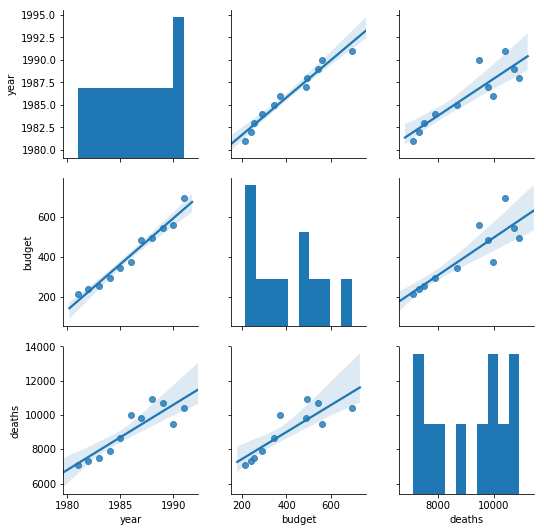

In [76]:
import seaborn as sns
sns.pairplot(drug_data,kind='reg')

#### Here Year seems to be the lurking variable that is affecting death and budget. Death and Budget variable are not related directly but through year

#### 4. Infant death rates and breast feeding

The data set infant.txt contains data on infant death rates (death) in 14 countries (1989 figures, deaths per 1000 of population). It also contains data on the percentage of mothers in those countries who are still breast feeding (feeding) at six months, as well as the percentage of the population who have access to safe drinking water (water).

Create a fitted line plot treating death as the response y and feeding as the predictor x. Based on what you see, what causal relationship might you be tempted to conclude?

Create a fitted line plot treating feeding as the response y and water as the predictor x. What relationship does the plot suggest?

What is going on here? Summarize the relationships between death, feeding, and water and explain why it might appear that as the percentage of mothers breast feeding at six months increases, so does the infant death rate.

In [77]:
infant_data = pd.read_csv("DataSets/infant.txt",header = 0,sep='\t')
infant_data

,death,feeding,water
0,10,27,100
1,9,41,99
2,28,56,72
3,40,50,70
4,39,73,80
5,59,38,97
6,60,72,88
7,62,87,47
8,64,51,93
9,100,89,47


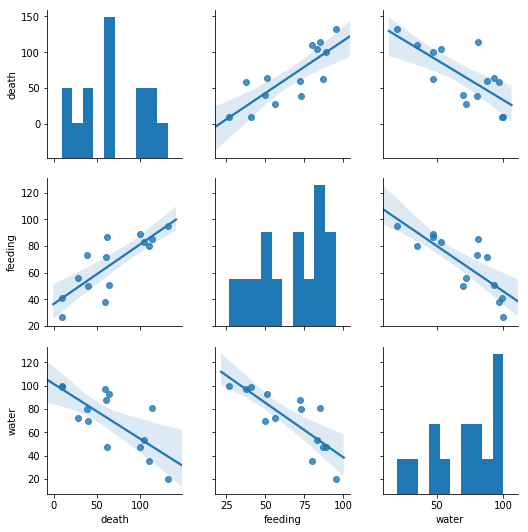

In [79]:
sns.pairplot(infant_data,kind='reg')

Here , Death and water / Water and feeding are negatively associated with each other. 
It seems that water is the lurking variable affecting deaths and feeding. 